<div align="justify"><h1><b><font size="6">
  Input Assumptions for Modelling the Transport Sector in the negaWatt-BE Scenario 2025</h1></font></div>
<div align="justify"><h2><b><font size="5">
  DEMAND OF TRANSPORT SECTOR IN BELGIUM
</h2></font></b></div>

---
<div align="justify"><h3><font size="3">
  <b> Developers:</b> BERNAERTS Valentine, LATERRE Antoine
</h3></font></div>
    
---

To ensure transparency and consistency within the negaWatt-BE project, this notebook documents all key input assumptions related to the transport sector. It replicates the numerical values and hypotheses presented in the [official negaWatt-BE Scenario 2025](https://www.negawatt.be/que-fait-on/le-scenario-negawatt-belgium/), allowing direct comparison with the sufficiency scenario displayed in the [negaWatt-BE dashboard](https://www.negawatt.be/scenario/250611/BE_combined_scenario_chart.html). This version fully aligns with the data used in the negaWatt-BE Scenario 2025, although some assumptions remain simplified or lack detailed sourcing.

<font size="5"><b>Table of Contents</b></font><a class="anchor" id="contents"></a> <br>
1. [Introduction](#section_1)
    - 1.1. [Sufficiency vs Efficiency](#section_1_1)
    - 1.2. [Global Demands](#section_1_2)
        - 1.2.1. [Passenger Mobility (land-based)](#section_1_2_1)
        - 1.2.2. [Freight (land-based)](#section_1_2_2)
        - 1.2.3. [Aviation](#section_1_2_3)
2. [Passenger Mobility](#section_2)
    - 2.1. [Modal Shares](#section_2_1)
        - 2.1.1. [Gentle Modes](#section_2_1_1)
        - 2.1.2. [Rail](#section_2_1_2)
        - 2.1.3. [Road](#section_2_1_3)
        - 2.1.4. [Global data processing](#section_2_1_4)
    - 2.1. [Carriers Shares](#section_2_2)

<font size="5"><b>References</b></font><a class="anchor" id="references"></a> <br>
* [1] CLEVER network (2023). *Climate neutrality, Energy security and Sustainability: A pathway to bridge the gap through Sufficiency, Efficiency and Renewables* [Final report].<br>Available at: https://clever-energy-scenario.eu/wp-content/uploads/2023/10/CLEVER_final-report.pdf.
* [2] CLEVER network (2023). *Climate neutrality, Energy security and Sustainability: A pathway to bridge the gap through Sufficiency, Efficiency and Renewables* [Dataset].<br>Available at: https://data.clever-energy-scenario.eu/Data_CLEVER.xlsx.
* [3] Mantzos, Leonidas; Rozsai, Mate; Matei, Nicoleta Anca; Mulholland, Eamonn; Tamba, Marie; Wiesenthal, Tobias (2018): JRC-IDEES 2015. European Commission, Joint Research Centre (JRC) [Dataset].<br>DOI: 10.2905/JRC-10110-10001 PID: http://data.europa.eu/89h/jrc-10110-10001
* [4] Rozsai, Mate; Jaxa-Rozen, Marc; Salvucci, Raffaele; Sikora, Przemyslaw; Tattini, Jacopo; Neuwahl, Frederik (2024): JRC-IDEES-2021. European Commission, Joint Research Centre (JRC) [Dataset].<br>PID: http://data.europa.eu/89h/82322924-506a-4c9a-8532-2bdd30d69bf5
* [5] Service public fédéral Mobilité et Transports (2019). *Enquête MONITOR sur la mobilité des Belges*. Bruxelles: SPF Mobilité et Transports. [Final report].<br>Retrieved from: https://mobilit.belgium.be/fr/publications/enquete-monitor-sur-la-mobilite-des-belges<br>
* [6] Service public fédéral Mobilité et Transports (2022). *Vision Rail 2040 – Le rail : la colonne vertébrale de la mobilité en Belgique*. Bruxelles: SPF Mobilité et Transports. [Final report].<br>Retrieved from: https://mobilit.belgium.be/fr/publications/le-rail-la-colonne-vertebrale-de-la-mobilite-en-belgique<br>

<font size="5"><b>Project functions</b></font><a class="anchor" id="project_functions"></a>

In [1]:
# Automatically reload the file if it is modified:
%load_ext autoreload
%autoreload 2

# Import packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the macro parameters:
%run ./demand_model_macro_nW-BE-2025.ipynb

# Option to print and plot the results:
post_process = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---

<font size="5"><b>1. Introduction</b></font> <a class="anchor" id="section_1"></a>

---

---

<font size="4"><b>1.2. Global Demands</b></font> <a class="anchor" id="section_1_2"></a>

---

---

<font size="3"><b>1.2.1. Passenger Moblity (land-based)</b></font> <a class="anchor" id="section_1_2_1"></a>

---

The travelled distance represents the total number of kilometres covered annually by the population using all land-based transport modes, included gentle (e.g., foot). It is expressed in passenger-kilometers. It includes commuting, leisure, and other mobility needs. In 2019, this value amounts at **151.9 Gpkm/year**, which corresponds to an average of **13200 km/person/year**. This value was obtained by extrapolating the 2015 values from JRC-IDEES [3] (non-gentle) and the data from the Monitor study [5]. These values were also used for Belgium in the CLEVER scenario [1,2].

$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$<br>
In line with negaWatt France 2017-2050 scenario $\textcolor{red}{[ref]}$, a **~15% reduction** is expected by 2050, driven by the expansion of teleworking and a higher share of urban housing. This leads to an estimated **130.2 Gpkm/year** by 2050, which is equivalent to **10915 km/person/year**.

> *<u>COMMENT:</u> **Update reduction!** We don't apply -15% but -14.3%. Valentine said -15%, likely because Assumptions_Transport_nWBE_220630.xlsx (Sebastien) claimed "General assumption: km/year/person in 2050 = 85 % of 2015". We need to check this in nW France 2017.*

> *<u>COMMENT:</u> **Update data!** For most modes, the projections were made starting from 2015 JRC data and extended to 2050. Now that updated JRC statistics are available up to 2021, it’s clear that the 2019 estimates used as baselines are inexact. This also highlights the need to revise the entire car breakdown using the most recent data.*

In [2]:
# Inputs - Define Sufficiency Scenario Data
suff_data = { 
    "specific_passenger_mobility [km/person/year]": [13200.00, 12800.00, 12500.00, 12250.00, 11700.00, 11300.00, 10914.99],
}

df_suff = pd.DataFrame(suff_data, index=years)
df_suff["population [pers]"] = df_suff.index.map(population_dict)
df_suff["passenger_mobility [Gpkm/year]"] = df_suff["specific_passenger_mobility [km/person/year]"]*df_suff["population [pers]"]*1e-9

---

<font size="3"><b>1.2.2. Freight (land-based)</b></font> <a class="anchor" id="section_1_2_2"></a>

---

The total freight activity remains stable around 75 Gtkm from 2020 to 2035, before dropping to 70 Gtkm from 2040 onwards.
> **Comment**: this sudden 5 Gtkm drop in just five years seems abrupt and not clearly justified by the scenario, it may require adjustment.

In [3]:
# Inputs - Total freight volumes in Gtkm
df_suff["freight_transport [Gtkm/year]"] = pd.Series([75.0, 75.0, 75.0, 75.0, 70.0, 70.0, 70.0], index=years)

---

<font size="3"><b>1.2.3. Aviation</b></font> <a class="anchor" id="section_1_2_3"></a>

---

Air travel plays a significant role in total mobility-related FEC, and an even greater role in GHG emissions due to its cumulative effects. However, its treatment in the scenario remains unclear in places and would benefit from clearer integration and harmonisation.

Current projections are based on JRC data from 2015 [3]. The dataset runs from 2015 to 2050, categorising flights as either intra-EU or extra-EU.

$\textcolor{Orange}{\textbf{Sufficiency Assumption}}$<br>
- Domestic flights within Belgium are excluded due to their negligible contribution.
- A strong reduction in air travel has been imposed. There will be a reduction of nearly 50% for intra-EU and extra-EU flights between 2015 and 2050.


Half of the reduced intra-EU flights are assumed to shift to international train travel. This reflects a political choice to reverse the growth trend in aviation and promote low-carbon alternatives.

> **Comment**: the current values for 2015 differ slightly from the JRC source, and updated 2019 data would help recalibrate the baseline. Current projections may be slightly too optimistic compared to real trends. Moreover, we exclude freight aviation.

> *<u>COMMENT:</u> **Question data!** Data are different from Assumptions_Transport_nWBE_220630.xlsx*

> **Comment**: Error : the supplementary train share will be affected to other countries (France, Spain, Germany mainly)

> **Comment**: in update version, include national and international train to see the effect of reduced aviationt.

> \$\textcolor{red}{\textbf{Important:}}\$ This scenario does not include aviation freight. In 2015, its contribution to total freight transport was still marginal, and it was omitted for the sake of simplicity. However, air freight has grown significantly since then, likely due to the establishment of major logistics hubs, such as the Alibaba warehouse in Liège. In light of this upward trend, it is crucial to reconsider this exclusion and explore ways to incorporate air freight into future scenario updates. 

In [4]:
# Inputs - Aviation Data
suff_data = { 
    "specific_passenger_mobility [km/person/year]": [13200.00, 12800.00, 12500.00, 12250.00, 11700.00, 11300.00, 10914.99],
}

# Passenger-kilometres for flights 
pkm_air = {
    'Domestic Belgium':       [     0,      0,      0,      0,      0,      0,      0],
    'International intra-EU': [15.311, 15.303, 12.753,  8.927,  8.927,  8.927,  8.927],
    'International extra-EU': [21.672, 19.129, 14.028, 10.202, 10.202, 10.202, 10.202],
}

df_air = pd.DataFrame(pkm_air, index=years).T.round(3)
df_air.loc["Total"] = df_air.sum(axis=0)
df_air

,2019,2025,2030,2035,2040,2045,2050
Domestic Belgium,0.000,0.000,0.000,0.000,0.000,0.000,0.000
International intra-EU,15.311,15.303,12.753,8.927,8.927,8.927,8.927
International extra-EU,21.672,19.129,14.028,10.202,10.202,10.202,10.202
Total,36.983,34.432,26.781,19.129,19.129,19.129,19.129


---

<font size="5"><b>2. Passenger Mobility</b></font> <a class="anchor" id="section_2"></a>

---

This section defines the modal and carrier shares used to allocate the total land-based passenger-kilometers across the different transport modes and transport carriers. 

---

<font size="4"><b>2.1. Modal Shares</b></font> <a class="anchor" id="section_2_1"></a>

---

This section defines the modal shares, which are expressed in percentages. Air transport is excluded, while walking and cycling (gentle modes) are explicitly included in the distribution.

The modal shares for 2019 are based on JRC-IDEES [3] and the gentle modes are based on the Monitor study [5]. In 2019, **74.75%** of all passenger-kilometres are made by car [3], while the remaining 25.25% are shared among public transport, cycling, walking, and other modes.

$\textcolor{Orange}{\textbf{Global Sufficiency Assumption}}$<br>
The objective is to **reduce car the modal share down to 48.3%** by 2050 through an increased use of gentle and collective mobility solutions. The objective for the subsequent years is therefore to reduce the proportion of cars in favour of more sustainable modes of transport. The expected evolution of each mode is defined by the following assumptions.

> **Comment**: For most modes, the projections were made starting from 2015 JRC data and extended to 2050. Now that updated JRC statistics are available up to 2021, it’s clear that the 2019 estimates used as baselines  are incorrect. This highlights the need to revise the entire car breakdown using the most recent data.

---

<font size="3"><b>2.1.1. Gentle</b></font> <a class="anchor" id="section_2_1_1"></a>

---

- **Pedestrian**: It is assumed that the proportion of people walking will increase slightly, from 2.00% to 3.00%, by 2050. This reflects ongoing urban policies that promote pedestrian zones and walkable city centres.
> **Comment**: This assumption may be conservative, given that trends in pedestrianisation could lead to a more significant shift in dense urban areas.
- **Bicycle**: The proportion of people cycling is increased from 4.70% to 12.00% (more than doubled). This growth is supported by the rapid adoption of electric bikes and major investments in cycling infrastructure, including dedicated cycle lanes and secure bike parking.

---

<font size="3"><b>2.1.2. Rail</b></font> <a class="anchor" id="section_2_1_2"></a>

---

- **Tram/metro**: It is assumed that there will be a slight increase from 0.95% to 1.20%.
> **Comment**: This may be a conservative estimate. Given the development of new tram lines in Liège and other cities, a higher increase could be expected, particularly if coordinated with upgrades to other modes of public transport.
- **Train**: The train share is projected to double, from 7.30% to 14.00%. This aligns with national strategies, such as Vision Rail 2040 [6]. The Minister of Transports targets a modal share of 15% by 2040 for trains, excluding gentle modes. When walking and cycling are included, this equates to around 13%, which lends weight to the plausibility of our target of 14% by 2050. 

---

<font size="3"><b>2.1.3. Road</b></font> <a class="anchor" id="section_2_1_3"></a>

---


- **Motorcycle**: Its share rises from 1.30% to 3.50%, which is more than double. This could be due to an increased use of two-wheelers for commuting in urban and peri-urban areas, particularly given the growing availability of low-emission or electric models.
- **Bus/coach**: The share doubles from 9.00% to 18.00%. This growth is considered plausible if rural and suburban areas are served by an expanded network of high-frequency bus services.
- **Car**: As a direct consequence of the increases in all other modes, the car modal share drops from 74.75% in 2019 to 48.30% in 2050, representing a 35% reduction.

---

<font size="3"><b>2.1.4. Global data processing</b></font> <a class="anchor" id="section_2_1_4"></a>

---


Mode,Unit,2019,2025,2030,2035,2040,2045,2050
pedestrian,% of total,2.00,2.20,2.40,2.60,2.80,2.90,3.00
,km/pers,264.18,281.71,300.22,318.28,327.87,327.43,327.83
,Gpkm,3.04,3.39,3.53,3.83,3.90,3.90,3.91
bicycle,% of total,4.70,5.20,7.00,8.50,9.80,11.00,12.00
,km/pers,620.47,665.64,875.15,1041.26,1146.71,1243.40,1309.64
,Gpkm,7.14,8.01,10.29,12.53,13.64,14.81,15.62
motorcycle,% of total,1.30,1.60,1.90,2.20,2.60,3.00,3.50
,km/pers,171.20,204.43,237.29,269.25,304.33,339.18,382.33
,Gpkm,1.97,2.46,2.79,3.24,3.62,4.04,4.56
car,% of total,74.75,72.55,67.70,62.20,55.70,51.45,48.30


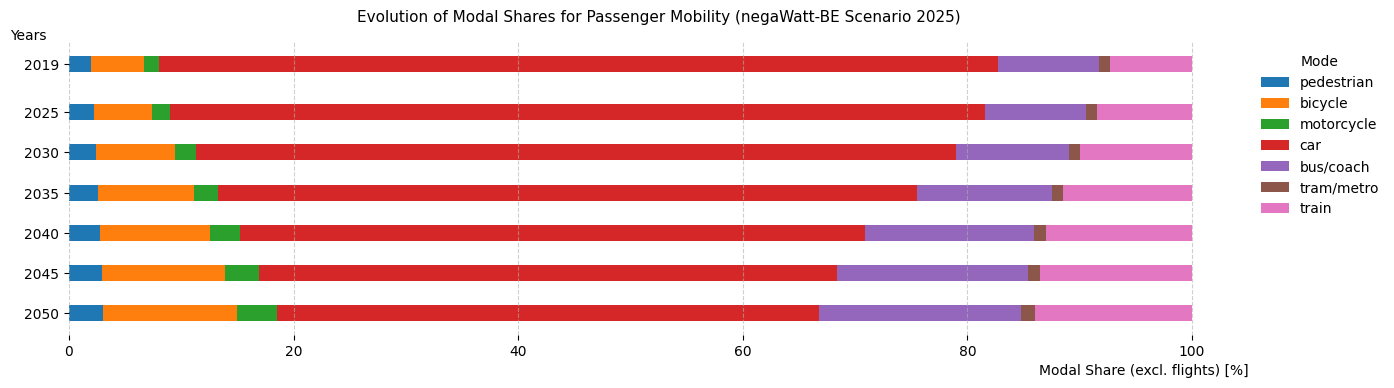

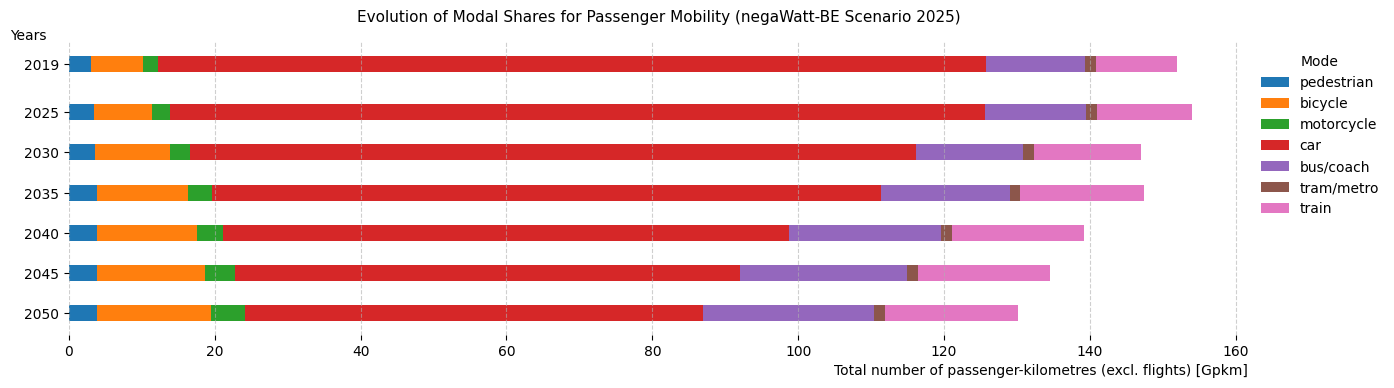

In [5]:
# Input - Modal Shares (in %)
modes = {
    'pedestrian': [ 2.00,  2.20,  2.40,  2.60,  2.80,  2.90,  3.00],
    'bicycle':    [ 4.70,  5.20,  7.00,  8.50,  9.80, 11.00, 12.00],
    'motorcycle': [ 1.30,  1.60,  1.90,  2.20,  2.60,  3.00,  3.50],
    'car':        [74.75, 72.55, 67.70, 62.20, 55.70, 51.45, 48.30],
    'bus/coach':  [ 9.00,  9.00, 10.00, 12.00, 15.00, 17.00, 18.00],
    'tram/metro': [ 0.95,  0.95,  1.00,  1.00,  1.10,  1.15,  1.20],
    'train':      [ 7.30,  8.50, 10.00, 11.50, 13.00, 13.50, 14.00],
}

# Processing - Modal Shares DataFrame
df_modal = pd.DataFrame(modes, index=years)
df_modal = df_modal.round(2).transpose()

# Processing - Global DataFrame
df_Gpkm = pd.DataFrame({year: df_suff["passenger_mobility [Gpkm/year]"][year]*df_modal[year]*1e-2 for year in years}, index=df_modal.index).round(2)
df_kmp  = pd.DataFrame({year: df_Gpkm[year]*1e+9/population_dict[year]                            for year in years}, index=df_modal.index).round(2)
arrays  =[np.repeat(df_modal.index, 3), ['% of total', 'km/pers', 'Gpkm'] * len(df_modal)]
mi      = pd.MultiIndex.from_arrays(arrays, names=['Mode', 'Unit'])
data_rows = []
for mode in df_modal.index:
    data_rows.append(df_modal.loc[mode].values)  # modal percentages
    data_rows.append(df_kmp  .loc[mode].values)  # km per person
    data_rows.append(df_Gpkm .loc[mode].values)  # Gpkm values
data = np.vstack(data_rows)
df_passenger_mobility = pd.DataFrame(data, index=mi, columns=years)

if post_process:
    df_passenger_mobility_r = df_passenger_mobility.reset_index()
    total_Gpkm = df_suff["passenger_mobility [Gpkm/year]"]
    total_kmp  = df_suff["specific_passenger_mobility [km/person/year]"]
    rows = []
    for unit in ['% of total', 'km/pers', 'Gpkm']:
        if unit == '% of total':
            vals = [100] * len(years)
        elif unit == 'Gpkm':
            vals = [total_Gpkm[year] for year in years]
        else:
            vals = [total_kmp [year] for year in years]
        rows.append(pd.DataFrame([['TOTAL', unit, *vals]], columns=df_passenger_mobility_r.columns))
    df_passenger_mobility_r = pd.concat([df_passenger_mobility_r] + rows, ignore_index=True)
    mode_full = df_passenger_mobility_r['Mode'].tolist()
    df_passenger_mobility_r['Mode'] = np.where(df_passenger_mobility_r['Unit'] == '% of total', df_passenger_mobility_r['Mode'], '')
    styled = (
        df_passenger_mobility_r.style
          .apply(highlight_lines, axis=1)
          .set_properties(subset=['Mode'], **{'font-weight':'bold'})
          .set_properties(subset=['Unit'], **{'font-style':'italic','color':'gray'})
          .format({year:"{:.2f}" for year in years})
          .set_caption("Modal Shares")
          .hide(axis='index')
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
    )
    display(styled)

    dfmp = df_modal.transpose()
    fig1, ax = plt.subplots(figsize=(14, 4))
    bottom = np.zeros(len(dfmp))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    for i, mode in enumerate(dfmp.columns):
        ax.barh(dfmp.index, dfmp[mode],
                left=bottom, label=mode,
                color=colors[i % len(colors)],
                height=bar_height)
        bottom += dfmp[mode]
    ax.set_xlabel("Modal Share (excl. flights) [%]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of Modal Shares for Passenger Mobility (negaWatt-BE Scenario 2025)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Mode", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig1.tight_layout()
    plt.show()

    dfmp = df_passenger_mobility.transpose()
    fig2, ax = plt.subplots(figsize=(14, 4))
    bottom = np.zeros(len(dfmp))
    colors = plt.cm.tab10.colors # default matplotlib palette
    # Thicker bars → control via height argument
    bar_height = 2.0  # default is ~0.8; increase to 0.9–1.0 for thicker bars
    j = 0
    for i, mode in enumerate(dfmp.columns):
        if mode[1] == 'Gpkm':
            ax.barh(dfmp.index, dfmp[mode],
                    left=bottom, label=mode[0],
                    color=colors[j % len(colors)],
                    height=bar_height)
            bottom += dfmp[mode]
            j += 1
    ax.set_xlabel("Total number of passenger-kilometres (excl. flights) [Gpkm]", fontsize=10, ha='right', va='top')
    ax.xaxis.set_label_coords(1, -0.1) 
    ax.set_ylabel("Years", fontsize=10, rotation=0, ha='left', va='bottom')
    ax.yaxis.set_label_coords(-0.05, 1)
    ax.set_yticks(years)
    ax.yaxis.set_inverted(True) # inverted axis with autoscaling
    ax.set_title("Evolution of Modal Shares for Passenger Mobility (negaWatt-BE Scenario 2025)", fontsize=11, pad=15)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', title="Mode", frameon=False)
    ax.grid(axis='x', linestyle='--', alpha=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    fig2.tight_layout()
    plt.show()


---

<font size="4"><b>2.2. Carriers Shares</b></font> <a class="anchor" id="section_2_2"></a>

---

This section presents the internal distribution of each transport mode by energy carrier or vehicle type, as a percentage of the total Gpkm for that mode. These shares are used to calculate the weighted energy demand and infrastructure needs per technology.

> **Comment**: For most modes, the projections were made starting from 2015 JRC data and extended to 2050. However, in the case of cars, the situation is different: the 2050 projections are based on estimated values for 2019, which themselves were derived from 2015 data. Now that updated JRC statistics are available up to 2021, it’s clear that the 2019 estimates used as a baseline for cars are inaccurate. To stay aligned with the rest of the analysis (which begins in 2019), the 2015 values are not displayed here, but this also highlights the need to revise the entire car breakdown using the most recent data.

---

<font size="3"><b>2.2.1. Bicycle </b></font> <a class="anchor" id="section_2_2_1"></a>

---

The bicycle mode is split between human-powered and electric bicycles. Shares are given as a percentage of total bicycle Gpkm [5].

$\textcolor{Orange}{\textbf{Comfort Assumption}}$<br>
- **Electric-powered**: 25% in 2020 → 40% in 2050. Growth driven by infrastructure and accessibility.
- **Human-powered**: 75% in 2020 → 60% in 2050. Slight decrease due to rising e-bike adoption.

> **Comment**: The carrier share breakdown should be revised using the updated 2020 data.

In [6]:
# Bicycle
bike_shares = {
    'human':      [75.0, 73.0, 70.0, 67.0, 64.0, 60.0, 60.0],
    'electrical': [25.0, 27.0, 30.0, 33.0, 36.0, 40.0, 40.0],
}
df_bike = pd.DataFrame(bike_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.2. Motorcycle </b></font> <a class="anchor" id="section_2_2_2"></a>

---

The motorcycle mode is divided between liquid-fuel and electric motorcycles. Shares refer to the percentage of total motorcycle Gpkm.

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
The goal is to minimise liquid fuel use as much as possible by 2050. However, full phase-out is unlikely, because e-fuels, biofuels or hybrids will probably remain.
- **Liquid fuel-powered**: 99.8% in 2020 → 15.0% in 2050
- **Electric-powered**: 0.2% in 2020 → 85.0% in 2050
- NGV/biomethane: excluded (0% throughout)

> **Comment**: Hybrid options, although excluded here, could also play a transitional role and should be considered.

> *<u>COMMENT:</u> **Question data!** In Assumptions_TransportnWBE_220630.xlsx, 15% NGV/biomethane by 2050. Why excluded here?*

> *<u>COMMENT:</u> **Question data!** Shouldn't we specify which liquid fuel here? As for cars*

In [7]:
# Motorcycle
moto_shares = {
    'liquid_fuel': [99.8, 95.0, 70.0, 45.0, 20.0, 20.0, 15.0],
    'electrical':  [ 0.2,  5.0, 30.0, 55.0, 80.0, 80.0, 85.0],
}
df_moto = pd.DataFrame(moto_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.3. Car </b></font> <a class="anchor" id="section_2_2_3"></a>

---

This mode includes all types of car, with shares expressed as a percentage of the total Gpkm for cars.

#### Fuel Switch

In 2019, only **0.5%** of the car fleet in Belgium is electrified [3]. Most vehicles still run on fossil fuels (diesel, petrol, CNG, etc.).

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
By 2050, the electrification ratio is expected to cover **99.5%** of the fleet. This implies a complete phase-out of combustion engines, progressively replaced by electric vehicles. The transition is assumed to be linear over the period.
- **Electric-powered**: 0.5% in 2020 → 99.5% in 2050.
- **Other power trains**: decrease proportionally, starting from their 2019 shares.

> **Comment**: Update values in new JRC.

> <u>COMMENT:</u> *Several efficiency data do not match Assumptions_Transport_nWBE_220630.xlsx (Sebastien) -> which ones should we take? Fuel switch don't match either!!!*

The following method is used to compute all car types except BEVs:
$$
\text{Share}_{y} = \text{Share}_{2019} \times \frac{100 - \text{BEV}_{y}}{99.5}
$$

#### Energy Consumption Improvement

In 2019, the average specific energy consumption for battery electric vehicles (BEV) in Belgium is set at **0.22 kWh/km** $\textcolor{red}{[ref]}$, representing the combined result of current vehicle design, driving habits, and technical performance.

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
By 2050, this value is expected to decrease to **0.13 kWh/km**, based on projections from the negaWatt France scenario $\textcolor{red}{[ref]}$. This value is directly used in the Belgian dashboard, assuming that vehicle efficiency evolves similarly in Belgium and France, without further national adaptation.

This overall improvement of 40% reflects the combined effect of several technological changes:
- lighter vehicles,
- improved aerodynamics,
- regenerative braking,
- more efficient powertrains and battery systems.
- Gradual adoption of speed-limiting policies and eco-driving behaviour

> **Comment**: Although these improvements implicitly account for the effects of reduced speed and vehicle weight, they are not modelled separately. Future work could aim to link these effects more transparently to this parameter.

In [8]:
# Car
tech_data = {
    "electrification [%]":  [ 0.500,  6.000, 18.000, 35.000, 56.000, 78.000, 99.500],  
    "efficiency [kWh/km]":  [ 0.220,  0.213,  0.190,  0.161,  0.145,  0.128,  0.128] 
}

df_techno = pd.DataFrame(tech_data, index=years)

initial_shares = {
    "gasoline":        35.3,
    "diesel":          62.5,
    "LPG":              0.2,
    "plug-in_gasoline": 1.1,
    "plug-in_diesel":   0.1,
    "bioCNG":           0.3,
    "hydrogen":         0.0,
}

car_shares = {}
for mode, init in initial_shares.items():
    projected = []
    for year in years:
        bev_pct = df_techno.loc[year, "electrification [%]"]
        projected.append(init * (100 - bev_pct) / 99.5)
    car_shares[mode] = projected
car_shares["electrical"] = df_techno["electrification [%]"].tolist()
df_cars = pd.DataFrame(car_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.4. Bus </b></font> <a class="anchor" id="section_2_2_4"></a>

---

The bus mode is split between liquid-fuel buses and electric buses. Shares are given as a percentage of total bus Gpkm.

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
The goal is to minimise liquid fuel use as much as possible by 2050.
- **Liquid-fuel**: 99.8% in 2019 → 10% in 2050.
- **Electric**: 0.2% in 2019 → 90% in 2050.

> **Comment**: It is a strong assumption that only 10% of buses will use liquid fuel by 2050. In 2020, 'liquid fuel' means diesel, but in 2050 it will mean e-fuel and/or biofuel. The JRC also mentions natural gas buses and hybrids are likely to be used. These figures should be revisited.

> *<u>COMMENT:</u> **Question data!** Shouldn't we specify which liquid fuel here? As for cars*

In [9]:
# Bus
bus_shares = {
    'liquid_fuel': [99.8, 98.0, 94.0, 82.0, 59.0, 35.0, 10.0],
    'electrical':  [ 0.2,  2.0,  6.0, 18.0, 41.0, 65.0, 90.0],
}
df_bus = pd.DataFrame(bus_shares, index=years).T.round(3)


---

<font size="3"><b>2.2.5. Train </b></font> <a class="anchor" id="section_2_2_5"></a>

---

The train mode is divided between electric and liquid-fuel trains. Shares are expressed as a percentage of total train Gpkm.

$\textcolor{Orange}{\textbf{Efficiency Assumption}}$<br>
- **Electric**: 90% in 2020 → 100% in 2040 and beyond. Complete electrification of the network.
- **Liquid-fuel**: 10% in 2020 → 0% in 2040. Gradual phase-out, mainly used for freight.

Linear transition until 2040, then fixed shares.

> *<u>COMMENT:</u> **Question data!** Shouldn't we specify which liquid fuel here? As for cars. Quite unlikely to go full eletrical.*

> *<u>COMMENT:</u> **Question data!** Shouldn't freight be excluded here? As it is treated hereunder... Or do we really have 10% diesel trains for passenger mobility in BE???*

In [10]:
# Train
train_shares = {
    'electrical':  [90, 92.5, 95, 97.5, 100, 100, 100],
    'liquid_fuel': [10,  7.5,  5,  2.5,   0,   0,   0],
}
df_train = pd.DataFrame(train_shares, index=years).T.round(3)

---

<font size="3"><b>2.2.6. Global data processing</b></font> <a class="anchor" id="section_2_2_6"></a>

---

In [11]:
df_ped = pd.DataFrame({'human': [100] * len(years)}, index=years).T
df_carriers = {
    'pedestrian': df_ped,
    'bicycle':    df_bike,
    'motorcycle': df_moto,
    'car':        df_cars,
    'bus':        df_bus,
    'train':      df_train,
}
rows = []
for carrier, df in df_carriers.items():
    temp = df.copy()
    temp['Mode']    = carrier
    temp['Carrier'] = temp.index
    temp = temp.reset_index(drop=True)
    rows.append(temp)
df_carrier = pd.concat(rows, ignore_index=True)

if post_process:
    df_carrier['Mode'] = df_carrier['Mode'].mask(df_carrier['Mode'].duplicated(), '')
    df_carrier_r = df_carrier[['Mode', 'Carrier'] + list(years)]
    styled = (
        df_carrier_r.style
          .hide(axis='index')
          .set_caption("Carrier Shares (%)")
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
          .apply(highlight_mode_separator, axis=1)
          .apply(lambda row: [bold_mode(cell, row['Mode'], col) for col, cell in zip(df_carrier_r.columns, row)], axis=1)
          .set_properties(subset=['Carrier'], **{'font-style':'italic'})
          .format({year: "{:.3f}%" for year in years})
    )
    display(styled)

Mode,Carrier,2019,2025,2030,2035,2040,2045,2050
pedestrian,human,100.000%,100.000%,100.000%,100.000%,100.000%,100.000%,100.000%
bicycle,human,75.000%,73.000%,70.000%,67.000%,64.000%,60.000%,60.000%
,electrical,25.000%,27.000%,30.000%,33.000%,36.000%,40.000%,40.000%
motorcycle,liquid_fuel,99.800%,95.000%,70.000%,45.000%,20.000%,20.000%,15.000%
,electrical,0.200%,5.000%,30.000%,55.000%,80.000%,80.000%,85.000%
car,gasoline,35.300%,33.349%,29.091%,23.060%,15.610%,7.805%,0.177%
,diesel,62.500%,59.045%,51.508%,40.829%,27.638%,13.819%,0.314%
,LPG,0.200%,0.189%,0.165%,0.131%,0.088%,0.044%,0.001%
,plug-in_gasoline,1.100%,1.039%,0.907%,0.719%,0.486%,0.243%,0.006%
,plug-in_diesel,0.100%,0.094%,0.082%,0.065%,0.044%,0.022%,0.001%


---

<font size="5"><b>3. Freight Transport</b></font> <a class="anchor" id="section_3"></a>

---

This section defines the modal and carrier shares used to allocate the total land-based tonne-kilometers across the different transport modes and transport carriers. 

---

<font size="4"><b>3.1. Modal Shares</b></font> <a class="anchor" id="section_3_1"></a>

---

This section defines the modal shares, which are expressed in percentages. Air transport is excluded.
The modal shares are based on JRC data from 2015 [3], with the objective of reducing road freight by shifting to rail and inland waterways.
> **Comment**: The reference year of 2015 has not been updated to reflect values from 2019. Additionally, the dataset used does not fully correspond to the figures provided by the JRC.

> *<u>COMMENT:</u> **Question data!** Why is international maritime excluded? Why is aviation excluded?*


---

<font size="3"><b>3.1.1. Inland Waterways</b></font> <a class="anchor" id="section_3_1_1"></a>

---

The proportion of inland waterborne freight is expected to grow from 15% in 2019 to 23% in 2050. Assuming a gradual and continuous increase, this growth would counterbalance the reduction in road freight without placing excessive strain on the rail network.
It is important to note that international waterborne freight is calculated separately but excluded from these modal share percentages. This is because its volumes are very large compared to domestic freight, which would visually distort the shares and mask smaller but important changes in other modes.

---

<font size="3"><b>3.1.2. Rail</b></font> <a class="anchor" id="section_3_1_2"></a>

---

In 2019, rail accounted for 10% of the total. Based on 'Vision Rail 2040' [6], the expected target is 20%. However, this scenario intentionally remains below the 20% target in order to preserve a significant role for inland waterways. Here, the share increases to 19% in 2040 and remains constant until 2050.
> **Comment**: This constant evolution over ten years does not seem realistic to me, as real systems evolve more progressively.

---

<font size="3"><b>3.1.3. Road</b></font> <a class="anchor" id="section_3_1_3"></a>

---

Road freight decreases from 75% in 2020 to 58% in 2050. The shift away from road is motivated by the need to decarbonize the sector and reduce energy demand. It is disaggregated in two ways:
- by **type of route**:
    - **National** freight decreases from 35% to 27% between 2020 and 2050.
    - **International** freight drops from 40% to 31% over the same period.
- by **vehicle type**:
    - **LCVs** (light commercial vehicles) remain stable at around 1.5–1.6%, reflecting their continued use for short-distance and last-mile logistics.
    - **HDVs** (heavy-duty vehicles), which dominate the road freight segment, see a reduction from 73.5% in 2020 to 56.4% in 2050, consistent with the overall decrease in road freight.

Both breakdowns refer to the same total share of road freight and cannot be added together. The objective is to reduce long-distance freight, especially that carried by HDVs, which can more easily be shifted to rail or water. LCVs remain dominant for short urban deliveries and are considered to be a constant factor.

> **Comment**: The "type of travel" data (national and international) is taken from the dashboard and therefore does not have a real source. They were used to determine the total road freight transport rather than JRC valuesAn assumption was then applied to split the total into LCVs and HDVs. This approach differs from the actual JRC figures.

---

<font size="3"><b>3.1.4. Global data processing</b></font> <a class="anchor" id="section_3_1_4"></a>

---


In [12]:
# Input - Modal Shares (in %)
modes = {
    'rail':                [10.0, 12.0, 14.0, 17.0, 19.0, 19.0, 19.0],
    'inland_water':        [15.0, 16.0, 18.0, 20.0, 22.0, 23.0, 23.0],
    'road':                [75.0, 72.0, 68.0, 63.0, 59.0, 58.0, 58.0],
    'road_national':       [35.0, 34.0, 32.0, 29.0, 26.5, 27.0, 27.0],
    'road_internaltional': [40.0, 38.0, 36.0, 34.0, 32.5, 31.0, 31.0],
    'road_HDV':            [73.5, 70.5, 66.5, 61.5, 57.4, 56.4, 56.4],
    'road_LCV':            [ 1.5,  1.5,  1.5,  1.5,  1.6,  1.6,  1.6],
}

# Processing - Modal Shares DataFrame
df_modal = pd.DataFrame(modes, index=years)
df_modal = df_modal.round(2).transpose()

# Processing - Global DataFrame
df_Gtkm = pd.DataFrame({year: df_suff["freight_transport [Gtkm/year]"][year]*df_modal[year]*1e-2 for year in years}, index=df_modal.index).round(2)
arrays  =[np.repeat(df_modal.index, 2), ['% of total', 'Gtkm'] * len(df_modal)]
mi      = pd.MultiIndex.from_arrays(arrays, names=['Mode', 'Unit'])
data_rows = []
for mode in df_modal.index:
    data_rows.append(df_modal.loc[mode].values)  # modal percentages
    data_rows.append(df_Gtkm .loc[mode].values)  # Gtkm values
data = np.vstack(data_rows)
df_freight_transport = pd.DataFrame(data, index=mi, columns=years)
df_freight_transport

if post_process:
    df_freight_transport_r = df_freight_transport.reset_index()
    total_Gtkm = df_suff["freight_transport [Gtkm/year]"]
    rows = []
    for unit in ['% of total', 'Gtkm']:
        if unit == '% of total':
            vals = [100] * len(years)
        else:
            vals = [total_Gtkm[year] for year in years]
        rows.append(pd.DataFrame([['TOTAL', unit, *vals]], columns=df_freight_transport_r.columns))
    df_freight_transport_r = pd.concat([df_freight_transport_r] + rows, ignore_index=True)
    mode_full = df_freight_transport_r['Mode'].tolist()
    df_freight_transport_r['Mode'] = np.where(df_freight_transport_r['Unit'] == '% of total', df_freight_transport_r['Mode'], '')
    styled = (
        df_freight_transport_r.style
          .apply(highlight_lines, axis=1)
          .set_properties(subset=['Mode'], **{'font-weight':'bold'})
          .set_properties(subset=['Unit'], **{'font-style':'italic','color':'gray'})
          .format({year:"{:.2f}" for year in years})
          .set_caption("Modal Shares")
          .hide(axis='index')
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
    )
    display(styled)

Mode,Unit,2019,2025,2030,2035,2040,2045,2050
rail,% of total,10.00,12.00,14.00,17.00,19.00,19.00,19.00
,Gtkm,7.50,9.00,10.50,12.75,13.30,13.30,13.30
inland_water,% of total,15.00,16.00,18.00,20.00,22.00,23.00,23.00
,Gtkm,11.25,12.00,13.50,15.00,15.40,16.10,16.10
road,% of total,75.00,72.00,68.00,63.00,59.00,58.00,58.00
,Gtkm,56.25,54.00,51.00,47.25,41.30,40.60,40.60
road_national,% of total,35.00,34.00,32.00,29.00,26.50,27.00,27.00
,Gtkm,26.25,25.50,24.00,21.75,18.55,18.90,18.90
road_internaltional,% of total,40.00,38.00,36.00,34.00,32.50,31.00,31.00
,Gtkm,30.00,28.50,27.00,25.50,22.75,21.70,21.70


---

<font size="4"><b>3.2. Carrier Shares</b></font> <a class="anchor" id="section_3_2"></a>

---

This section defines the carries shares, which are expressed in percentages. Air transport is excluded. The carrier shares are all based on JRC data from 2015 [3].


---

<font size="3"><b>3.2.1. Light commercial vehicle (LCV)</b></font> <a class="anchor" id="section_3_2_1"></a>

---
 
The breakdown of LCV technologies is based on vehicle-kilometre projections available from 2019.

In 2019, almost all LCVs (97.7%) operated on liquid fuels. The goal is for this share to drop to 0% by 2050. This complete phase-out will be replaced by a mix of alternative technologies.

$\textcolor{Orange}{\textbf{Assumption:}}$

- **Battery electric vehicles** (BEVs): increasing from 0.2% in 2019 to 58.4% in 2050 and becoming the dominant technology.
- **Plug-in gas hybrids**, introduced after 2020, will reach 21.6% by 2050.
- **Hydrogen vehicles** will gradually increase to account for 20.0% of the market by 2050.
- **Diesel plug-in hybrid**s are used temporarily as a transition technology, peaking at 10.0% in 2035, before disappearing completely by 2050.
- **LPG** and **NGV/biomethane**: with small shares in 2019 (1.5% and 0.6%, respectively), they are assumed to be phased out rapidly.
> **Comment**: this projection is likely unrealistic, because phasing out liquid fuels entirely by 2050 ignores the potential role of e-fuels. Additionally, a 20% market share for hydrogen LCVs seems optimistic based on current market trends. Nevertheless, LCVs represent only a minor part of total freight.
> **Comment**: where are these data from??.

In [13]:
# Light commercial vehicle
shares_lcv = {
    'liquid_fuels':     [97.700, 96.000, 76.500, 53.000, 33.265, 14.828,  0.000],
    'LPG':              [ 1.500,  1.000,  0.500,  0.000,  0.000,  0.000,  0.000],
    'NGV/biomethane':   [ 0.600,  0.612,  0.309,  0.156,  0.040,  0.000,  0.000],
    'hydrogen':         [ 0.000,  0.000,  0.000,  1.000,  4.000, 12.000, 20.000],
    'electric':         [ 0.200,  1.388, 13.037, 31.222, 44.399, 52.412, 58.425],
    'plug-in_diesel':   [ 0.000,  1.000,  8.045,  9.748,  8.316,  5.508,  0.000],
    'plug-in_gasoline': [ 0.000,  0.000,  1.609,  4.874,  9.980, 15.252, 21.575],
}

df_lcv = pd.DataFrame(shares_lcv, index=years).T.round(3)

---

<font size="3"><b>3.2.2. Heavy-duty vehicle (HDV)</b></font> <a class="anchor" id="section_3_2_2"></a>

---

The technology breakdown for heavy-duty vehicles is based on projections of tonne-kilometres travelled between 2019.

In 2019, trucks using liquid fuel (diesel) dominated the sector, representing 99.7% of the market. As with light commercial vehicles (LCVs), the goal by 2050 is to reduce this to 0%, with trucks being progressively replaced by a mix of electric, hydrogen and gas-based drivetrains.

$\textcolor{Orange}{\textbf{Assumption:}}$

- **Electric trucks**: introduced slowly, reaching 30.0% by 2045.
- **Hydrogen trucks**: progressively ramping up to become the leading alternative, with 32.4% of the market in 2050.
- **Trucks running on NGV/biomethane**: increasing from 0.6% in 2020 to 37.6% in 2050.
- **LPG trucks**: completely phased out after 2020.

> **Comment**: This scenario seems ambitious. Phasing out diesel completely by 2050 could underestimate the potential of synthetic fuels such as e-diesel, particularly for long-haul applications. The projected rise of hydrogen trucks (32.4%) is more realistic for long-distance freight, assuming strong policy support and infrastructure. However, a 30% market share for electric trucks seems high given that batteries take up a lot of space and reduce payload capacity. It’s also surprising that hybrid trucks aren’t considered here, as they could play an important role during the transition.
> **Note:** More than half of freight truck activity is international (from/to NL, FR, DE), which limits the impact of national policy on technology choices and fleet transition.

In [14]:
# Heavy-duty vehicle
shares_hdv = {
    'liquid_fuels':   [99.300, 98.000, 92.000, 77.000, 49.000, 16.000,  0.000],
    'LPG':            [ 0.100,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000],
    'NGV/biomethane': [ 0.600,  1.500,  3.000,  8.000, 16.000, 26.533, 37.599],
    'hydrogen':       [ 0.000,  0.000,  1.000,  5.000, 15.000, 27.467, 32.401],
    'electric':       [ 0.000,  0.500,  4.000, 10.000, 20.000, 30.000, 30.000],
}

df_hdv = pd.DataFrame(shares_hdv, index=years).T.round(3)

---

<font size="3"><b>3.2.3. Train</b></font> <a class="anchor" id="section_3_2_3"></a>

---

The fuel breakdown for rail freight is based on tonne-kilometre projections from 2019.

In 2019, approximately 25.3% of freight trains still use liquid fuels. The scenario assumes a progressive reduction in their share to 10.0% by 2050. The objective is to electrify as much of the rail freight network as possible.

\$\textcolor{Orange}{\textbf{Assumption:}}\$

* **Electric rail** is assumed to grow from 75% in 2020 to 90.0% in 2050, becoming the dominant energy source.
* **NGV/biomethane** and **hydrogen trains** are not considered in this trajectory (0% throughout).

> **Note**: despite efforts to reduce liquid fuel use, full electrification remains limited by factors outside national control — including the presence of international freight trains and private operators using non-electrified locomotives. These structural barriers constrain the pace of transition.

In [15]:
# Train
rail_shares = {
    'liquid_fuels': [25.0, 25.0, 24.0, 23.0, 20.0, 15.0, 10.0],
    'electricity':  [75.0, 75.0, 76.0, 77.0, 80.0, 85.0, 90.0],
}

df_rail = pd.DataFrame(rail_shares, index=years).T.round(3)

---

<font size="3"><b>3.2.4. Inland waterway vessels</b></font> <a class="anchor" id="section_3_2_4"></a>

---

The fuel mix for inland waterway vessels is assumed to gradually shift from liquid fuels to alternative technologies, primarily NGV/biomethane. The total transition occurs progressively between 2020 and 2050.

\$\textcolor{Orange}{\textbf{Assumption:}}\$

* **Liquid fuels** remain the only energy source in 2019 but drop steadily to 50.0% in 2050.
* **NGV / biomethane** enters the mix after 2020 and reaches 50.0% in 2050, fully replacing the reduction in liquid fuel share.
* Other technologies such as electricity or hydrogen are not considered in this scenario.

> **Comment**: In PyPSA (see section 7), other technologies such as hydrogen and oil are considered for inland shipping. Also, why not methanol? This raises the question of whether limiting the scenario to replacing liquid fuel with NGV/biomethane alone is too restrictive.


In [16]:
# Inland waterway vessels
shares_water = {
    'liquid_fuels': [100.0, 91.7, 83.3, 75.0, 66.7, 58.3, 50.0],
    'NGV/biofuels': [  0.0,  8.3, 16.7, 25.0, 33.3, 41.7, 50.0],
}

df_water_freight = pd.DataFrame(shares_water, index=years).T.round(3)


---

<font size="3"><b>3.2.5. Global data processing</b></font> <a class="anchor" id="section_3_2_5"></a>

---


In [17]:
df_carriers = {
    'road_LCV':     df_lcv,
    'road_HDV':     df_hdv,
    'rail':         df_rail,
    'inland_water': df_water_freight,
}
rows = []
for mode, df in df_carriers.items():
    temp = df.copy()
    temp['Mode'] = mode
    temp['Type'] = temp.index
    temp = temp.reset_index(drop=True)
    rows.append(temp)
df_carrier = pd.concat(rows, ignore_index=True)

if post_process:
    df_carrier['Mode'] = df_carrier['Mode'].mask(df_carrier['Mode'].duplicated(), '')
    df_carrier_r = df_carrier[['Mode', 'Type'] + list(years)]
    styled = (
        df_carrier_r.style
          .hide(axis='index')
          .set_caption("Carrier Shares (%)")
          .set_table_attributes('style="width:100%;table-layout:fixed;"')
          .apply(highlight_mode_separator, axis=1)
          .apply(lambda row: [bold_mode(cell, row['Mode'], col) for col, cell in zip(df_carrier_r.columns, row)], axis=1)
          .set_properties(subset=['Type'], **{'font-style':'italic'})
          .format({year: "{:.3f}%" for year in years})
    )
    display(styled)

Mode,Type,2019,2025,2030,2035,2040,2045,2050
road_LCV,liquid_fuels,97.700%,96.000%,76.500%,53.000%,33.265%,14.828%,0.000%
,LPG,1.500%,1.000%,0.500%,0.000%,0.000%,0.000%,0.000%
,NGV/biomethane,0.600%,0.612%,0.309%,0.156%,0.040%,0.000%,0.000%
,hydrogen,0.000%,0.000%,0.000%,1.000%,4.000%,12.000%,20.000%
,electric,0.200%,1.388%,13.037%,31.222%,44.399%,52.412%,58.425%
,plug-in_diesel,0.000%,1.000%,8.045%,9.748%,8.316%,5.508%,0.000%
,plug-in_gasoline,0.000%,0.000%,1.609%,4.874%,9.980%,15.252%,21.575%
road_HDV,liquid_fuels,99.300%,98.000%,92.000%,77.000%,49.000%,16.000%,0.000%
,LPG,0.100%,0.000%,0.000%,0.000%,0.000%,0.000%,0.000%
,NGV/biomethane,0.600%,1.500%,3.000%,8.000%,16.000%,26.533%,37.599%


---

<font size="5"><b>4. Aviation</b></font> <a class="anchor" id="section_4"></a>

---


In [18]:
# Passenger-kilometres for flights 
Gpkm_air = {
    'Domestic Belgium':       [     0,      0,      0,      0,      0,      0,      0],
    'International intra-EU': [15.311, 15.303, 12.753,  8.927,  8.927,  8.927,  8.927],
    'International extra-EU': [21.672, 19.129, 14.028, 10.202, 10.202, 10.202, 10.202],
}

df_air = pd.DataFrame(Gpkm_air, index=years).T.round(3)
df_air.loc["Total"] = df_air.sum(axis=0)


---

<font size="5"><b>5. Conversion to TWh</b></font> <a class="anchor" id="section_5"></a>

---

In this section, I focus on generating the input data required by the PyPSA-Eur model for the transport sector. More specifically, I extract and format the values used in the script "Clever_data_code.py".

These data correspond to final energy consumption (FEC) per final energy carrier and are used as exogenous inputs in the PyPSA-Eur model. They are derived directly from the energy values used in the scenario assessment in the previous section ('modal share' and 'carrier share'), but are expressed in different units (e.g. TWh, Gtkm) and are based on several assumptions.

---

<font size="4"><b>6.1. Passenger road mobility </b></font> <a class="anchor" id="section_6_1"></a>

---

$\textcolor{steelblue}{\textbf{Simplification:}}$

At this stage, only data from cars is considered. Other modes of passenger transport, such as buses and motorcycles, are excluded.

The aim is to express final energy demand per carrier in TWh/year using previously calculated demand in passenger kilometres (pkm), assuming an average energy intensity per car technology.

> **comment**: Buses and motorcycles are included in energy demand calculations. However, buses will represent ~20% of total passenger transport by 2050 yet aren't used in current PyPSA inputs. To me, this is not negligible.

In [19]:
# # --- Energy demand [kWh/km] for all car types ---

# # Energy content per unit  --> Sources??


# energy_content = {
#     "gasoline":        9.21, # [kWh/L]
#     "diesel":         10.17, # [kWh/L]
#     "LPG":             6.69, # [kWh/L]
#     "NGV/biomethane": 11.30, # [kWh/kg]
#     "hydrogen":       33.30  # [kWh/kg]
# }

# # Base demand in fuel unit per 100 km  --> Sources??
# consumption_per_100km = {
#     "Gasoline": 7.151,         # [L/100km]
#     "Diesel": 5.947,           # [L/100km]
#     "LPG": 9.402,              # [L/100km]
#     "NGV / biomethane": 4.182, # [kg/100km]
#     "Hydrogen": 1.127          # [kg/100km]
# }

# # Electrification share for PHEVs
# share_electric = 0.70

# # Convert to kWh/km
# df_consumption_kWh_km = pd.DataFrame({
#     fuel: (consumption_per_100km[fuel] * energy_content[fuel]) / 100
#     for fuel in consumption_per_100km
# }, index=years).T

# # BEV efficiency (data from "df_techno" provided in the section 1.2 efficiency)
# df_bev = df_techno["efficiency [kWh/km]"].to_frame().T
# df_bev.index = ["BEV car"]

# # Compute hybrid demand
# df_phev_consumption = pd.DataFrame({
#     f"Plug-in_{fuel}": df_consumption_kWh_km.loc[fuel] * (1 - share_electric) + df_bev.loc["BEV car"] * share_electric
#     for fuel in ["Gasoline", "Diesel", "LPG"]
# }, index=years).T

# # Combine
# df_combined = pd.concat([df_consumption_kWh_km, df_phev_consumption, df_bev])
# df_combined.columns.name = "Year"



# # --- Travel demand [Gpkm] for all car types ---

# # Get Gpkm for cars (data from "df_gpkm" provided in the section 1.1 sufficiency)
# gpkm_car = df_gpkm.loc["car"]

# # Multiply car shares by Gpkm total for cars (data from "df_cars" provided in the section 3.2 car)
# gpkm_by_car_type = df_cars*gpkm_car/100



# # --- Final Energy Demand By Car Type (TWh) ---

# # Compute energy demand in TWh (data from "df_suff" provided in the section 1.1 sufficiency)
# energy_demand_TWh = gpkm_by_car_type.values * df_combined.values / df_suff["car_occupancy [pers/car]"].values

# # Rebuild the final DataFrame
# energy_demand_TWh = pd.DataFrame(energy_demand_TWh, index=gpkm_by_car_type.index, columns=years).round(2)
# energy_demand_TWh.loc["Total road passenger"] = energy_demand_TWh.sum(axis=0)

# # put the impact of the speed limit & weight for each year (data from "df_suff" provided in the section 1.1 sufficiency) 
# energy_demand_TWh = energy_demand_TWh* (1 + df_suff["speed_limit_gain [%]"] / 100) * (1 + df_suff["weight_reduction_gain [%]"] / 100)

# def highlight_pypsa_inputs(row):
#     if row.name in ["Total road passenger", "Total road freight", "Total rail passenger", "Total rail freight", "Total air transport [TWh]", "National Fossil Fuel"]:
#         return ['background-color: #ffcccc; font-weight: bold'] * len(row)
#     return [''] * len(row)

# styled = (
#     energy_demand_TWh
#     .style
#     .apply(highlight_pypsa_inputs, axis=1)
#     .format("{:.2f}")
#     .set_caption("Final Energy Demand for Passenger Cars [TWh/year]")
# )
# display(styled)